In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm
import itertools
from tensorflow.keras.models import load_model
import random
from tensorflow.keras.preprocessing import image
from matplotlib import interactive
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import matplotlib.image as mpimg


img_width, img_height = 150, 150

train_data_dir = "C:/Users/20115/Desktop/Exp/train"
validation_data_dir = "C:/Users/20115/Desktop/Exp/validation"
nb_train_samples = 477
nb_validation_samples = 477
epochs = 20
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
    

model = Sequential()
model.add(Conv2D(24, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(48, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
    

loss='categorical_crossentropy'



model.compile(loss=loss,
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=16,class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=16,class_mode='categorical')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)




print(model.summary())
model.save('Covid_Phenomena_30.model')

Found 477 images belonging to 3 classes.
Found 477 images belonging to 3 classes.
Epoch 1/20
29/29 [==============================] - 29s 998ms/step - loss: 1.1165 - accuracy: 0.3210 - val_loss: 1.0930 - val_accuracy: 0.4009
Epoch 2/20
29/29 [==============================] - 30s 1s/step - loss: 1.0960 - accuracy: 0.3926 - val_loss: 0.9566 - val_accuracy: 0.6530
Epoch 3/20
29/29 [==============================] - 30s 1s/step - loss: 0.9280 - accuracy: 0.5662 - val_loss: 1.3496 - val_accuracy: 0.5603
Epoch 4/20
29/29 [==============================] - 30s 1s/step - loss: 0.8223 - accuracy: 0.6443 - val_loss: 0.6812 - val_accuracy: 0.6875
Epoch 5/20
29/29 [==============================] - 29s 1s/step - loss: 0.6786 - accuracy: 0.7137 - val_loss: 0.4600 - val_accuracy: 0.8039
Epoch 6/20
29/29 [==============================] - 28s 977ms/step - loss: 0.6044 - accuracy: 0.7328 - val_loss: 0.5326 - val_accuracy: 0.7328
Epoch 7/20
29/29 [==============================] - 33s 1s/step - loss: 

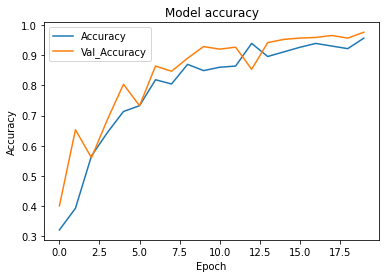

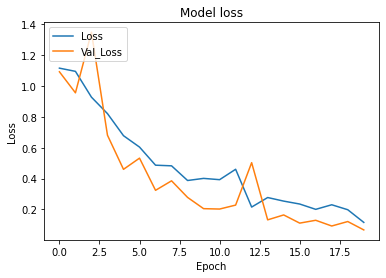

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()